# Pandas library

Pandas is a popular open-source library in Python used for data manipulation and analysis. It provides data structures and functions that simplify working with structured data, such as tabular data, time series, and more. Pandas is built on top of NumPy, another fundamental library for numerical computing in Python.

Here are some key features and uses of Pandas in data science:

* **Data Structures**: Pandas introduces two main data structures: **Series and DataFrame**. A Series is a one-dimensional labeled array that can hold any data type. A DataFrame is a two-dimensional labeled data structure, similar to a table or a spreadsheet, with columns of potentially different data types. These data structures provide a powerful foundation for handling and analyzing data.

* **Data Manipulation**: Pandas offers a wide range of functions and methods to manipulate data. It allows you to **filter, sort, reshape, merge, and aggregate data**, making it easy to perform common data manipulation tasks. Pandas also provides **flexible indexing and slicing capabilities**, enabling efficient data extraction and transformation.

* **Data Cleaning**: Pandas provides functionalities to handle **missing data, duplicate values, and outliers**. You can fill missing values, drop duplicates, and identify or handle anomalies in the data. These operations are crucial for preparing data for further analysis.

* **Data Analysis**: Pandas enables **exploratory data analysis (EDA)** by providing statistical and descriptive summary functions. You can calculate **basic statistics, perform grouping and aggregation, and generate visualizations** to gain insights into the data. Pandas integrates well with other data analysis libraries, such as Matplotlib and Seaborn, to create sophisticated visualizations.

* **Data Input/Output**: Pandas supports reading and writing data from various file formats, including **CSV, Excel, SQL databases, and more**. It simplifies the process of importing and exporting data, making it convenient for data scientists to work with diverse data sources.

# Vectorization

Vectorization in pandas refers to performing **operations on entire arrays or columns of data without explicitly writing loops**. It leverages the underlying capabilities of NumPy, which pandas is built upon, to optimize computation and improve performance.

By using vectorized operations, you can perform **operations on entire arrays or columns in a single step, rather than iterating over each element**. This approach avoids the overhead of looping and allows for more concise and efficient code.

Pandas provides numerous built-in **vectorized functions and operations** that can be applied to Series and DataFrame objects. These functions are designed to handle arrays of data efficiently, making it easy to perform common operations such as **arithmetic calculations, mathematical functions, string operations, and more**.

Here are some examples of vectorized operations in pandas:

* **Arithmetic Operations**: You can perform element-wise arithmetic operations (**addition, subtraction, multiplication, division**) between Series or DataFrame objects. For example, adding two Series will automatically align the indices and perform the operation on corresponding elements.

* **Mathematical Functions**: Pandas provides vectorized mathematical functions, such as **sqrt(), exp(), log(), sin(), cos(), etc.,** which can be applied to entire Series or DataFrame objects. These functions are optimized to handle large arrays efficiently.

* **String Operations**: Pandas allows you to apply string operations to Series or DataFrame columns without the need for explicit loops. Functions like **str.len(), str.lower(), str.upper(), str.contains(), etc.,** can be applied to manipulate and extract information from string data.

* **Boolean Operations**: You can perform vectorized boolean operations, such as **& (and), | (or), and ~ (not),on boolean Series or DataFrame columns**. These operations allow you to combine and filter data based on logical conditions efficiently.

Using vectorized operations in pandas offers several advantages, including **improved performance, cleaner code, and the ability to handle large datasets more efficiently**. It is recommended to leverage vectorization **whenever possible**, as it can significantly enhance the speed and readability of your data manipulation and analysis tasks.

In general, vectorization is a powerful technique in Pandas to improve performance and efficiency. However, in cases where operations are **dependent on previous or subsequent values, involve complex conditions, or deal with unstructured data**, you may need to resort to other approaches to effectively manipulate the data.

# About data 

* Contributions to reservoirs for energy generation in the National Interconnected System (SIN).

* Daily data from hydrological stations in SIN for the period 2000-2018 (not all stations cover this period)

# Download data from:
* https://drive.google.com/drive/folders/1SNhjkp5QNrqInLuELMSZ-dtSPDviafN4?usp=sharing
* https://www.xm.com.co/.

In [1]:
# import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import calendar # to obtain months
from sklearn.preprocessing import MinMaxScaler# normalize data
import seaborn as sns #  box and whisker plot

In [2]:
# you are specifying that floating-point numbers in pandas should be displayed with four decimal places of precision.
pd.options.display.float_format = '{:.4f}'.format

### Read .xlsx files and create a DataFrame.

In [3]:
# Path to the folder containing the Excel files
folder_path = r'C:/Users/jaech/Mi_unidad/CURSOS/CURSOS_2023_III/ANALISIS/Archivos análisis de datos ambientales_2023_I/Semana_11/APORTES_SIN/aportes_diarios'

# Get a list of all Excel files in the folder
excel_files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

# Concatenate all Excel files into a single DataFrame
dfs = []
for file in excel_files:
    df = pd.read_excel(os.path.join(folder_path, file), header=None, skiprows=3)
    df.columns = df.iloc[0]  # Assign the fourth row as column names
    df = df[1:]  # Remove the fourth row
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
df_combined = pd.concat(dfs, axis=0, ignore_index=True)

# Set multi-index
# df_combined.set_index(['Fecha','Region Hidrologica', 'Nombre Rio'], inplace=True)

print(df_combined.head())


0  NaN       Fecha Region Hidrologica                 Nombre Rio  \
0  NaN  2000-01-01          ANTIOQUIA             A. SAN LORENZO   
1  NaN  2000-01-01          ANTIOQUIA                 CONCEPCION   
2  NaN  2000-01-01          ANTIOQUIA  DESV. EEPPM (NEC,PAJ,DOL)   
3  NaN  2000-01-01          ANTIOQUIA                     GRANDE   
4  NaN  2000-01-01          ANTIOQUIA                  GUADALUPE   

0 Aportes Caudal m3/s Aportes Energia kWh Aportes %  
0             18.5000             3924500    0.6508  
1              5.3700             1103300    1.1033  
2              9.9800             2050500    1.3061  
3             28.0300             5192100    1.2019  
4             15.8200             3250400    1.1286  


In [4]:
df_combined

,NaN,Fecha,Region Hidrologica,Nombre Rio,Aportes Caudal m3/s,Aportes Energia kWh,Aportes %
0,NaN,2000-01-01,ANTIOQUIA,A. SAN LORENZO,18.5000,3924500,0.6508
1,NaN,2000-01-01,ANTIOQUIA,CONCEPCION,5.3700,1103300,1.1033
2,NaN,2000-01-01,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",9.9800,2050500,1.3061
3,NaN,2000-01-01,ANTIOQUIA,GRANDE,28.0300,5192100,1.2019
4,NaN,2000-01-01,ANTIOQUIA,GUADALUPE,15.8200,3250400,1.1286
...,...,...,...,...,...,...,...
173752,NaN,2018-12-31,VALLE,ALTOANCHICAYA,19.9000,2119600,0.3833
173753,NaN,2018-12-31,VALLE,CALIMA,5.3800,239500,0.3326
173754,NaN,2018-12-31,VALLE,CAUCA SALVAJINA,64.9800,1527400,0.3061
173755,NaN,2018-12-31,VALLE,DIGUA,15.0100,191700,0.4079


### Remove nan columns

In [5]:
# drops nan column
df_combined.drop(df_combined.columns[df_combined.columns.isna()], axis=1, inplace = True)
df_combined

,Fecha,Region Hidrologica,Nombre Rio,Aportes Caudal m3/s,Aportes Energia kWh,Aportes %
0,2000-01-01,ANTIOQUIA,A. SAN LORENZO,18.5000,3924500,0.6508
1,2000-01-01,ANTIOQUIA,CONCEPCION,5.3700,1103300,1.1033
2,2000-01-01,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",9.9800,2050500,1.3061
3,2000-01-01,ANTIOQUIA,GRANDE,28.0300,5192100,1.2019
4,2000-01-01,ANTIOQUIA,GUADALUPE,15.8200,3250400,1.1286
...,...,...,...,...,...,...
173752,2018-12-31,VALLE,ALTOANCHICAYA,19.9000,2119600,0.3833
173753,2018-12-31,VALLE,CALIMA,5.3800,239500,0.3326
173754,2018-12-31,VALLE,CAUCA SALVAJINA,64.9800,1527400,0.3061
173755,2018-12-31,VALLE,DIGUA,15.0100,191700,0.4079


### Create a DataFrame with each river in a separate column for the flow rate variable

In [6]:
#create a copy of data
df_caudal = df_combined.copy()
# Step 1: Convert 'Fecha' column to datetime index
df_caudal['Fecha'] = pd.to_datetime(df_caudal['Fecha'])
df_caudal.set_index('Fecha', inplace=True)

# Step 2: Drop 'Region Hidrologica' column
df_caudal.drop('Region Hidrologica', axis=1, inplace=True)

# Step 3: Extract unique values from 'Nombre Rio' column
unique_rivers = [      'A. SAN LORENZO',
                           'CONCEPCION',
            'DESV. EEPPM (NEC,PAJ,DOL)',
                               'GRANDE',
                            'GUADALUPE',
                              'GUATAPE',
                                 'NARE',
                           'SAN CARLOS',
                               'TENCHE',
                          'BOGOTA N.R.',
                    'MAGDALENA BETANIA',
                                'PRADO',
                                 'BATA',
                                'CHUZA',
                               'GUAVIO',
               'OTROS RIOS (ESTIMADOS)',
                               'CALIMA',
                      'CAUCA SALVAJINA',
                                        ]

# Create new columns for each unique river value
for river in unique_rivers:
    df_caudal[river] = df_caudal[df_caudal['Nombre Rio'] == river]['Aportes Caudal m3/s']

# Step 4: Remove the original Aportes Caudal m3/s', 'Aportes Energia kWh', 'Aportes %','Nombre Rio','OTROS RIOS (ESTIMADOS)' columns
df_caudal.drop(columns= ['Aportes Caudal m3/s', 'Aportes Energia kWh', 'Aportes %','Nombre Rio','OTROS RIOS (ESTIMADOS)'], axis=1, inplace=True)

# Now, your DataFrame has the desired columns with rivers as separate columns.

In [7]:
# drop nan column
df_caudal.drop(df_caudal.columns[df_caudal.columns.isna()], axis=1, inplace = True)
df_caudal

,A. SAN LORENZO,CONCEPCION,"DESV. EEPPM (NEC,PAJ,DOL)",GRANDE,GUADALUPE,GUATAPE,NARE,SAN CARLOS,TENCHE,BOGOTA N.R.,MAGDALENA BETANIA,PRADO,BATA,CHUZA,GUAVIO,CALIMA,CAUCA SALVAJINA
Fecha,,,,,,,,,,,,,,,,,
2000-01-01,18.5000,5.3700,9.9800,28.0300,15.8200,26.2600,43.5100,12.1400,2.3400,7.7300,221.6300,33.8200,9.2600,2.4200,13.1400,20.0400,249.1100
2000-01-01,18.5000,5.3700,9.9800,28.0300,15.8200,26.2600,43.5100,12.1400,2.3400,7.7300,221.6300,33.8200,9.2600,2.4200,13.1400,20.0400,249.1100
2000-01-01,18.5000,5.3700,9.9800,28.0300,15.8200,26.2600,43.5100,12.1400,2.3400,7.7300,221.6300,33.8200,9.2600,2.4200,13.1400,20.0400,249.1100
2000-01-01,18.5000,5.3700,9.9800,28.0300,15.8200,26.2600,43.5100,12.1400,2.3400,7.7300,221.6300,33.8200,9.2600,2.4200,13.1400,20.0400,249.1100
2000-01-01,18.5000,5.3700,9.9800,28.0300,15.8200,26.2600,43.5100,12.1400,2.3400,7.7300,221.6300,33.8200,9.2600,2.4200,13.1400,20.0400,249.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,19.0360,5.2490,5.8310,17.8300,11.8420,28.1790,26.1370,15.9380,2.8000,5.2400,NaN,41.2700,7.1600,0.1400,10.5300,5.3800,64.9800
2018-12-31,19.0360,5.2490,5.8310,17.8300,11.8420,28.1790,26.1370,15.9380,2.8000,5.2400,NaN,41.2700,7.1600,0.1400,10.5300,5.3800,64.9800
2018-12-31,19.0360,5.2490,5.8310,17.8300,11.8420,28.1790,26.1370,15.9380,2.8000,5.2400,NaN,41.2700,7.1600,0.1400,10.5300,5.3800,64.9800


In [8]:
df_caudal.index

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=173757, freq=None)

### Remove duplicate rows with duplicated dates from the DataFrame

In [9]:
# Is there at least one duplicated row?
df_caudal_mask = df_caudal.index.duplicated()
df_caudal_mask.any() == True

True

#### False means No duplicated rows

In [10]:
# drops duplicate rows with duplicates dates
# The value True in the mask indicates that the corresponding row is duplicated, 
# while the value False indicates that the row is not duplicated
df_caudal_mask = df_caudal.index.duplicated()#>> False indicates that there is no duplicated row
df_caudal = df_caudal[~df_caudal_mask] # The negation of False allows for the selection of non-duplicated rows
print(df_caudal.index)
print(df_caudal)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=6940, freq=None)
0          A. SAN LORENZO CONCEPCION DESV. EEPPM (NEC,PAJ,DOL)  GRANDE  \
Fecha                                                                    
2000-01-01        18.5000     5.3700                    9.9800 28.0300   
2000-01-02        21.2800     5.4700                   10.1500 28.5100   
2000-01-03        14.6100     5.4300                   10.0900 25.8300   
2000-01-04        13.7000     5.4400                   10.1000 30.7600   
2000-01-05        22.7800     5.4000                   10.0200 31.7400   
...             

### Compare the index of the resulting DataFrame with a pandas date_range

In [11]:
# date range equals to index of df
date_range = pd.date_range(start=df_caudal.index[0], end=df_caudal.index[-1], freq='D')
# print(date_range)
print(df_caudal.index)
print(date_range)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=6940, freq=None)
DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=6940, freq='D')


In [12]:
(date_range == df_caudal.index).all()

True

### Print the column names (rivers) of the DataFrame

In [13]:
df_caudal.columns

Index(['A. SAN LORENZO', 'CONCEPCION', 'DESV. EEPPM (NEC,PAJ,DOL)', 'GRANDE',
       'GUADALUPE', 'GUATAPE', 'NARE', 'SAN CARLOS', 'TENCHE', 'BOGOTA N.R.',
       'MAGDALENA BETANIA', 'PRADO', 'BATA', 'CHUZA', 'GUAVIO', 'CALIMA',
       'CAUCA SALVAJINA'],
      dtype='object', name=0)

In [14]:
df_caudal.shape

(6940, 17)

In [15]:
df_caudal.columns.shape

(17,)

### Convert Data type of rivers (columns)

In [16]:
# Print the data type. In this case, the data is not numeric; it is an object.
print(df_caudal.dtypes)

0
A. SAN LORENZO               object
CONCEPCION                   object
DESV. EEPPM (NEC,PAJ,DOL)    object
GRANDE                       object
GUADALUPE                    object
GUATAPE                      object
NARE                         object
SAN CARLOS                   object
TENCHE                       object
BOGOTA N.R.                  object
MAGDALENA BETANIA            object
PRADO                        object
BATA                         object
CHUZA                        object
GUAVIO                       object
CALIMA                       object
CAUCA SALVAJINA              object
dtype: object


In [17]:
# Convert the object type to numeric type simultaneously for the columns in the dataframe
df_caudal = df_caudal.apply(pd.to_numeric)

In [18]:
# df_caudal = df_caudal.round(3)

In [19]:
print(df_caudal.dtypes)

0
A. SAN LORENZO               float64
CONCEPCION                   float64
DESV. EEPPM (NEC,PAJ,DOL)    float64
GRANDE                       float64
GUADALUPE                    float64
GUATAPE                      float64
NARE                         float64
SAN CARLOS                   float64
TENCHE                       float64
BOGOTA N.R.                  float64
MAGDALENA BETANIA            float64
PRADO                        float64
BATA                         float64
CHUZA                        float64
GUAVIO                       float64
CALIMA                       float64
CAUCA SALVAJINA              float64
dtype: object


### Describe the data in the DataFrame using descriptive statistics.

In [20]:
df_caudal.describe()

,A. SAN LORENZO,CONCEPCION,"DESV. EEPPM (NEC,PAJ,DOL)",GRANDE,GUADALUPE,GUATAPE,NARE,SAN CARLOS,TENCHE,BOGOTA N.R.,MAGDALENA BETANIA,PRADO,BATA,CHUZA,GUAVIO,CALIMA,CAUCA SALVAJINA
count,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,5781.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000,6940.0000
mean,39.4634,6.7330,7.8174,31.5008,22.1282,36.8342,50.0943,27.6042,4.4646,30.4973,417.7134,56.6080,78.2597,10.3828,70.3457,11.6359,124.7297
std,29.2664,4.1206,3.4560,18.0906,13.7610,22.5867,31.5663,23.6115,3.0829,32.2169,247.4364,70.1963,81.2144,11.7413,62.7435,8.6272,79.5412
min,4.1700,0.0000,0.0000,5.3230,1.0600,0.3710,6.1460,3.7210,0.0270,0.0000,2.1700,0.0000,2.7100,0.0000,0.0000,0.0000,3.6100
25%,20.6145,4.1960,5.6200,18.9198,12.8800,21.6700,27.0895,12.7000,2.4900,9.0275,251.5800,15.4875,21.4100,2.7200,24.6900,5.6100,65.8500
50%,29.8290,5.5270,7.7940,26.4325,18.4715,30.8240,41.7575,20.0950,3.5495,22.6500,356.6300,34.3150,55.4500,6.6000,53.8250,9.8050,106.3800
75%,48.0650,7.9630,10.1015,38.5140,26.8985,45.3500,64.6377,34.1815,5.4750,40.5300,511.8300,69.9600,103.4725,13.9000,94.7250,15.6300,164.7225
max,412.7700,53.3680,18.8100,167.4290,144.5360,243.7940,309.6700,284.4400,39.9300,298.3500,2309.4400,833.7800,791.8000,116.9400,621.1300,97.3700,785.1600


### Number of NaN values per river (column)

In [21]:
df_caudal.isnull().sum()

0
A. SAN LORENZO                  0
CONCEPCION                      0
DESV. EEPPM (NEC,PAJ,DOL)       0
GRANDE                          0
GUADALUPE                       0
GUATAPE                         0
NARE                            0
SAN CARLOS                      0
TENCHE                          0
BOGOTA N.R.                     0
MAGDALENA BETANIA            1159
PRADO                           0
BATA                            0
CHUZA                           0
GUAVIO                          0
CALIMA                          0
CAUCA SALVAJINA                 0
dtype: int64

### Total NaN values in df

In [22]:
df_caudal.isnull().sum().sum()

1159

### Create a quick plot of the data

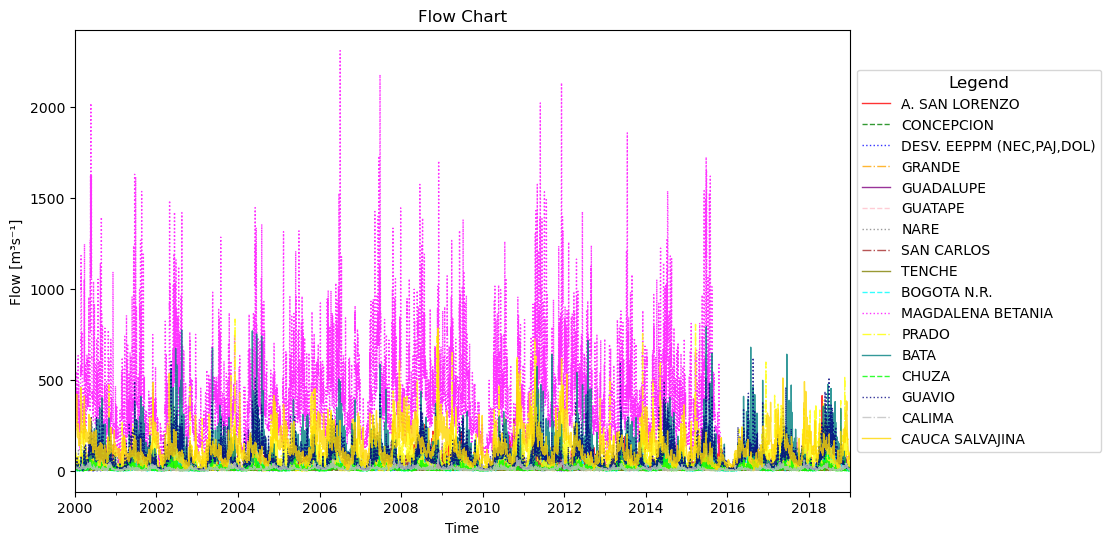

In [23]:
# Define the desired figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Define a list of colors and line styles
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'gray', 'brown', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'lime', 'navy', 'silver', 'gold', 'indigo']
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']

# Plot each river/column with a different color or line style
for i, column in enumerate(df_caudal.columns):
    df_caudal[column].plot(ax=ax, linestyle=linestyles[i % len(linestyles)], linewidth=1,alpha=0.8, color=colors[i % len(colors)])

# Set the title of the plot
ax.set_title('Flow Chart')

# Set the x-axis and y-axis labels
ax.set_xlabel('Time')
ax.set_ylabel('Flow [m³s⁻¹]')

# Show the legend and place it outside the figure
ax.legend(df_caudal.columns, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', title_fontsize='large')

# Show the plot
plt.show()


### Create a moving average for the rivers

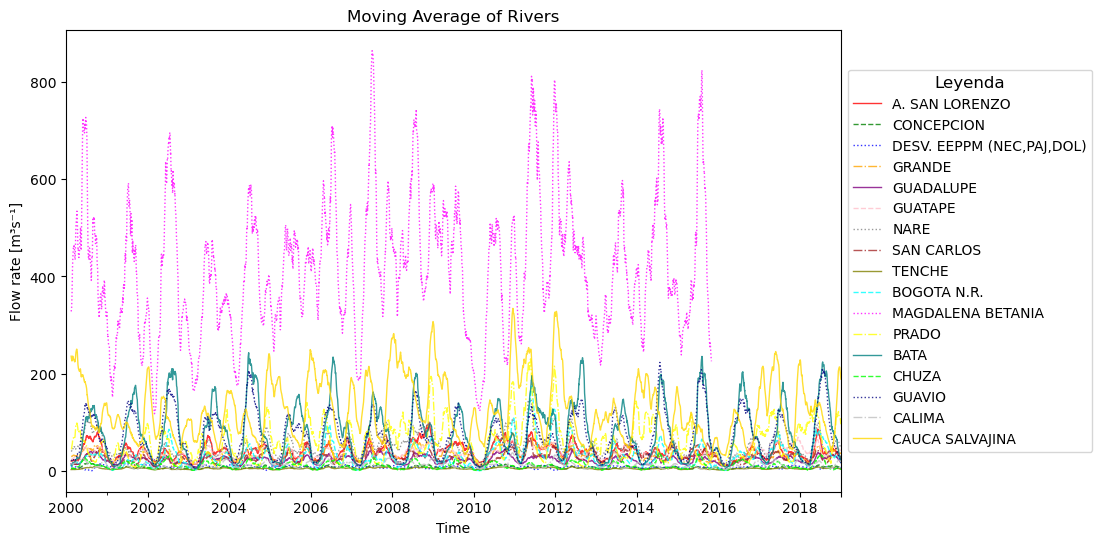

In [24]:
# Define la ventana de 48 meses
window = 48

# Calcula la media móvil para cada columna
df_caudal_rolling = df_caudal.rolling(window).mean()

# Define la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Define una lista de colores o estilos de línea
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'gray', 'brown', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'lime', 'navy', 'silver', 'gold', 'indigo']
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']

# Grafica la media móvil de cada columna con un color o estilo de línea distinto
for i, column in enumerate(df_caudal_rolling.columns):# The lists linestyles and colors will take values from 0 to divisor minus 1. For example, from 0 to len(linestyles) - 1.
    df_caudal_rolling[column].plot(ax=ax, linestyle=linestyles[i % len(linestyles)], linewidth=1,alpha=0.8, color=colors[i % len(colors)])

# Set the title of the plot
ax.set_title('Moving Average of Rivers')

# Set the labels for the x and y axes
ax.set_xlabel('Time')
ax.set_ylabel('Flow rate [m³s⁻¹]')


# Muestra la leyenda y colócala fuera de la figura
ax.legend(df_caudal_rolling.columns, loc='center left', bbox_to_anchor=(1, 0.5), title='Leyenda', title_fontsize='large')

# Muestra el gráfico
plt.show()


In [25]:
print(type(df_caudal))
print(df_caudal)

<class 'pandas.core.frame.DataFrame'>
0           A. SAN LORENZO  CONCEPCION  DESV. EEPPM (NEC,PAJ,DOL)  GRANDE  \
Fecha                                                                       
2000-01-01         18.5000      5.3700                     9.9800 28.0300   
2000-01-02         21.2800      5.4700                    10.1500 28.5100   
2000-01-03         14.6100      5.4300                    10.0900 25.8300   
2000-01-04         13.7000      5.4400                    10.1000 30.7600   
2000-01-05         22.7800      5.4000                    10.0200 31.7400   
...                    ...         ...                        ...     ...   
2018-12-27         16.7100      4.7770                     5.5940 17.9700   
2018-12-28         16.5660      4.7270                     5.4920 18.3030   
2018-12-29         16.2920      4.7960                     5.5000 17.6740   
2018-12-30         17.9000      5.0740                     5.6450 16.2780   
2018-12-31         19.0360      5.2490

### Calculate the moving average for the Guatape River

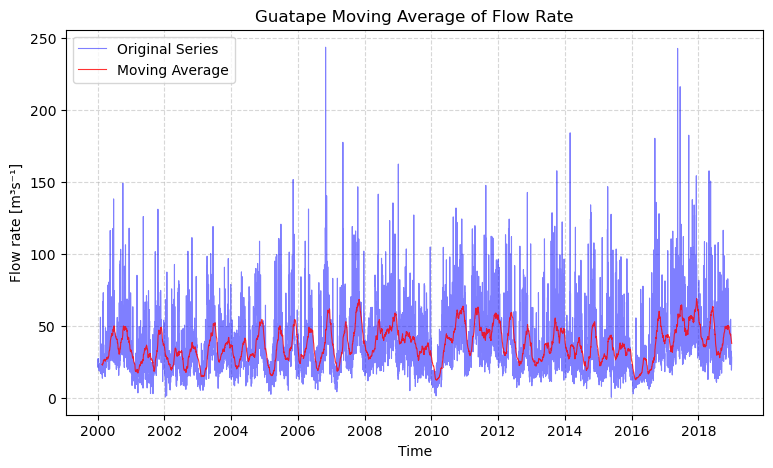

In [26]:
# retrieve GUATAPE column from df
caudalGuatape = df_caudal[['GUATAPE']]

# compute moving average in a windows of 48 months
media_movil = caudalGuatape.rolling(window=48).mean()

# Plot the original series and the moving average series on the same figure
plt.figure(figsize=(9, 5))
plt.plot(caudalGuatape.index, caudalGuatape['GUATAPE'], label='Original Series', alpha = 0.5, color = 'b',lw = 0.8)
plt.plot(media_movil.index, media_movil['GUATAPE'], label='Moving Average', alpha = 0.8,color='r',        lw = 0.8)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Flow rate [m³s⁻¹]')
plt.title('Guatape Moving Average of Flow Rate')
plt.legend()
plt.grid(linestyle='--',alpha = 0.5)

# Display the figure
plt.show()

### Calculate the moving median for the Guatape River

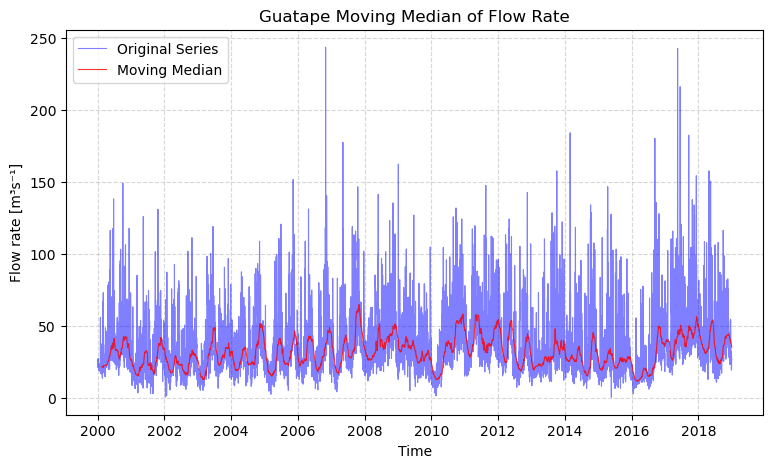

In [27]:
# retrieve GUATAPE column from df
caudalGuatape = df_caudal[['GUATAPE']]

# compute moving median in a window of 48 months
mediana_movil = caudalGuatape.rolling(window=48).median()

# Plot the original series and the moving median series on the same figure
plt.figure(figsize=(9, 5))
plt.plot(caudalGuatape.index, caudalGuatape['GUATAPE'], label='Original Series', alpha=0.5, color='b', lw=0.8)
plt.plot(mediana_movil.index, mediana_movil['GUATAPE'], label='Moving Median', alpha=0.8, color='r', lw=0.8)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Flow rate [m³s⁻¹]')
plt.title('Guatape Moving Median of Flow Rate')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)

# Display the figure
plt.show()


### Annual cycle with pandas

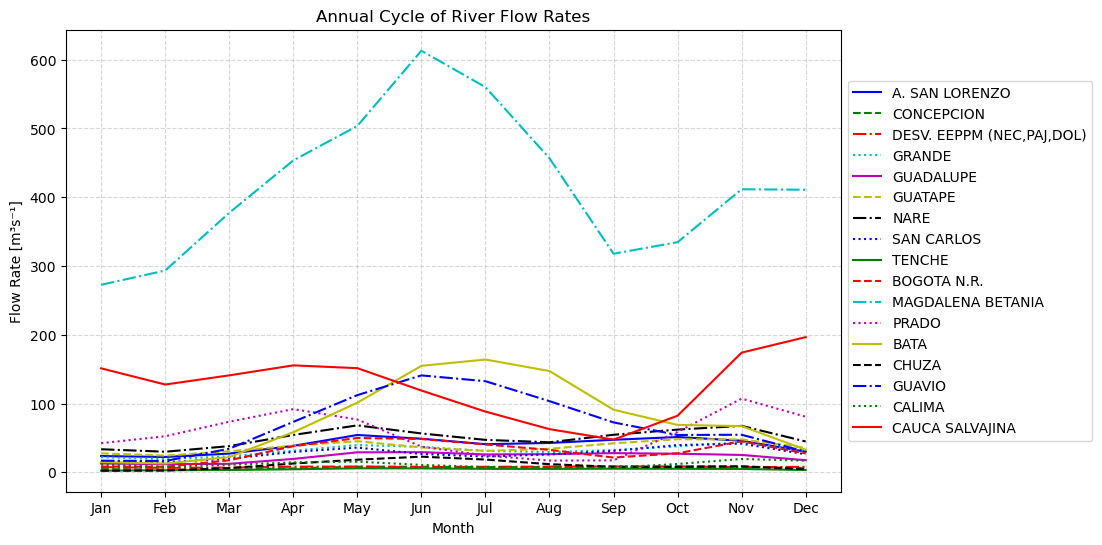

In [28]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate

# Extract the month from the index to create a new column representing the month
df['month'] = df.index.month

# Group the data by month and calculate the mean for each month across all years
df_grouped = df.groupby('month').mean()

# Plot the annual cycles for each river with different line styles or color combinations
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if needed
line_styles = ['-', '--', '-.', ':']  # Add more line styles if needed

for i, column in enumerate(df_grouped.columns):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    plt.plot(df_grouped.index, df_grouped[column], label=column, color=color, linestyle=line_style)

plt.xlabel('Month')
plt.ylabel('Flow Rate [m³s⁻¹]')
plt.title('Annual Cycle of River Flow Rates')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--', alpha=0.5)

# Set x-axis ticks as the months of the annual cycle
month_labels = [calendar.month_name[i][:3] for i in range(1, 13)]
plt.xticks(df_grouped.index, month_labels)

plt.show()

### Normalized Annual cycle with pandas

The Min-Max scaling process maps the minimum value in the dataset to 0 and the maximum value to 1. The rest of the values are scaled proportionally between 0 and 1 based on their relative position within the range of the minimum and maximum values

C:\Users\jaech\AppData\Local\Temp\ipykernel_13556\1767468006.py:60: UserWarning: Legend does not support handles for Legend instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend([legend_group1, legend_group2], ['Group 1', 'Group 2'], loc='center right')


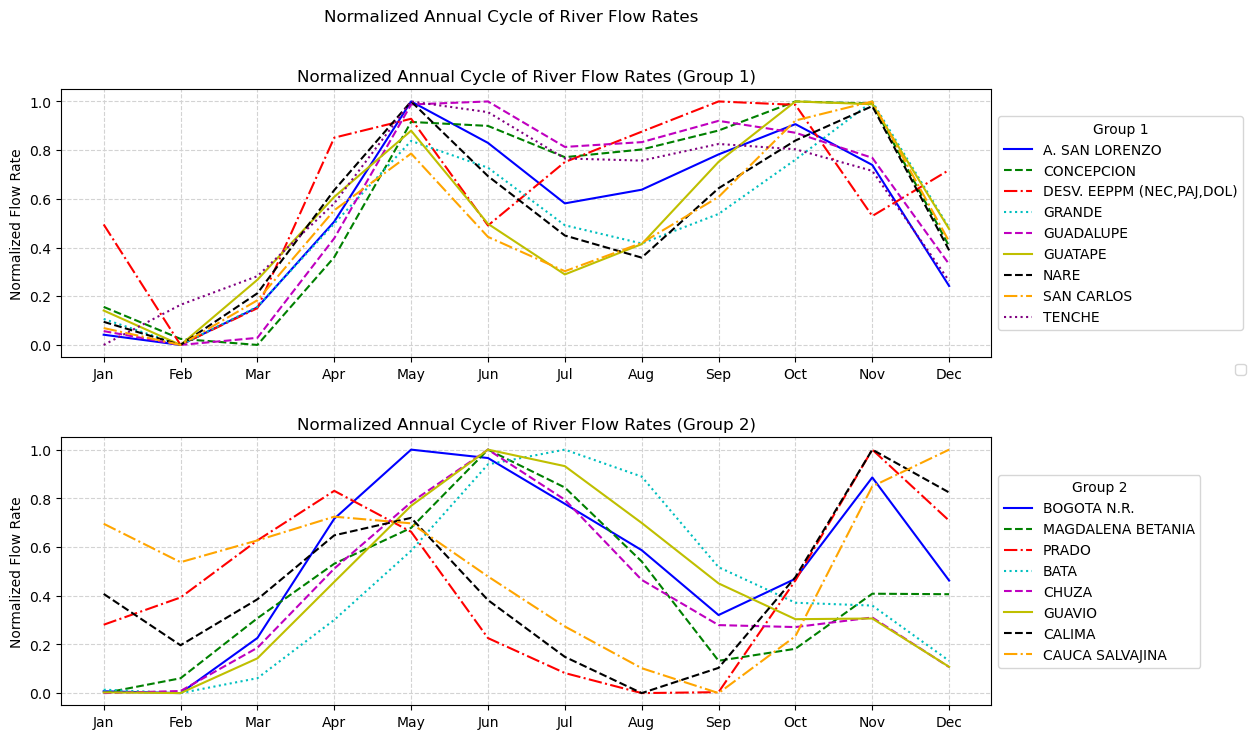

In [29]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Extract the month from the index to create a new column representing the month
df['month'] = df.index.month

# Group the data by month and calculate the mean for each month across all years
df_grouped = df.groupby('month').mean()

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns)

# Divide the rivers into two groups
rivers_group1 = df_normalized.columns[:9]
rivers_group2 = df_normalized.columns[9:]

# Create subplots with two subfigures
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

# Define colors and line styles for rivers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','purple']
line_styles = ['-', '--', '-.', ':','--']

# Plot the normalized annual cycles for rivers in group 1
for i, river in enumerate(rivers_group1):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    axes[0].plot(df_normalized.index, df_normalized[river], label=river, color=color, linestyle=line_style)

# Plot the normalized annual cycles for rivers in group 2
for i, river in enumerate(rivers_group2):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    axes[1].plot(df_normalized.index, df_normalized[river], label=river, color=color, linestyle=line_style)

# Set x-axis ticks as the months of the annual cycle
month_labels = [calendar.month_name[i][:3] for i in range(1, 13)]
axes[0].set_xticks(df_normalized.index)
axes[0].set_xticklabels(month_labels)
axes[1].set_xticks(df_normalized.index)
axes[1].set_xticklabels(month_labels)

# Set y-axis label for each subfigure
axes[0].set_ylabel('Normalized Flow Rate')
axes[1].set_ylabel('Normalized Flow Rate')

# Set title for each subfigure
axes[0].set_title('Normalized Annual Cycle of River Flow Rates (Group 1)')
axes[1].set_title('Normalized Annual Cycle of River Flow Rates (Group 2)')

# Create legends for each subfigure
legend_group1 = axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group 1")
legend_group2 = axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group 2")

# Add a common title for the entire figure
fig.suptitle('Normalized Annual Cycle of River Flow Rates')

# Add the legends to the figure
fig.legend([legend_group1, legend_group2], ['Group 1', 'Group 2'], loc='center right')

# Add a grid to the subfigures
axes[0].grid(color='lightgray', linestyle='--')
axes[1].grid(color='lightgray', linestyle='--')

# Adjust the spacing between subplots and move the second subplot title upward
plt.subplots_adjust(hspace=0.3, top=0.88)

plt.show()


### Normalized weekly cycle with pandas

C:\Users\jaech\AppData\Local\Temp\ipykernel_13556\4182691142.py:60: UserWarning: Legend does not support handles for Legend instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend([legend_group1, legend_group2], ['Group 1', 'Group 2'], loc='center right')


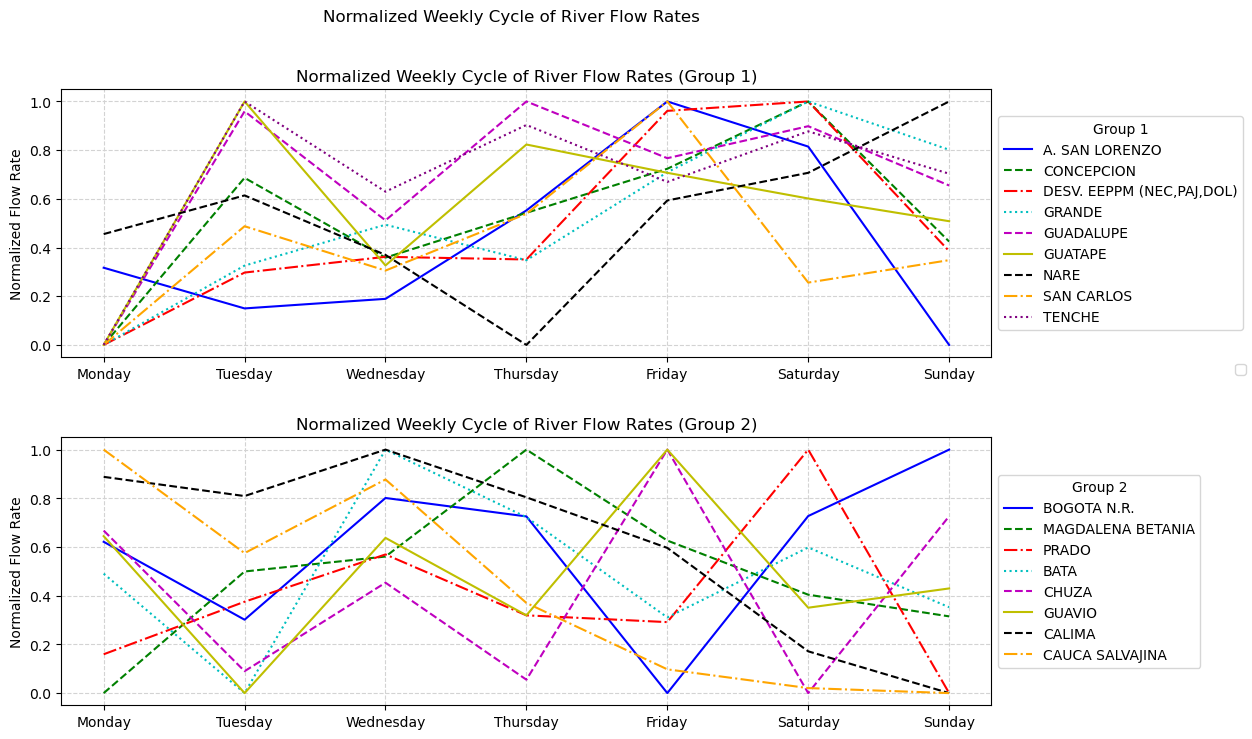

In [30]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Extract the day of the week from the index to create a new column representing the day of the week
df['day_of_week'] = df.index.dayofweek

# Group the data by day of the week and calculate the mean for each day across all years
df_grouped = df.groupby('day_of_week').mean()

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns)

# Divide the rivers into two groups
rivers_group1 = df_normalized.columns[:9]
rivers_group2 = df_normalized.columns[9:]

# Create subplots with two subfigures
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

# Define colors and line styles for rivers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','purple']
line_styles = ['-', '--', '-.', ':','--']

# Plot the normalized weekly cycles for rivers in group 1
for i, river in enumerate(rivers_group1):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    axes[0].plot(df_normalized.index, df_normalized[river], label=river, color=color, linestyle=line_style)

# Plot the normalized weekly cycles for rivers in group 2
for i, river in enumerate(rivers_group2):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    axes[1].plot(df_normalized.index, df_normalized[river], label=river, color=color, linestyle=line_style)

# Set x-axis ticks as the days of the week
day_labels = list(calendar.day_name)
axes[0].set_xticks(df_normalized.index)
axes[0].set_xticklabels(day_labels)
axes[1].set_xticks(df_normalized.index)
axes[1].set_xticklabels(day_labels)

# Set y-axis label for each subfigure
axes[0].set_ylabel('Normalized Flow Rate')
axes[1].set_ylabel('Normalized Flow Rate')

# Set title for each subfigure
axes[0].set_title('Normalized Weekly Cycle of River Flow Rates (Group 1)')
axes[1].set_title('Normalized Weekly Cycle of River Flow Rates (Group 2)')

# Create legends for each subfigure
legend_group1 = axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group 1")
legend_group2 = axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group 2")

# Add a common title for the entire figure
fig.suptitle('Normalized Weekly Cycle of River Flow Rates')

# Add the legends to the figure
fig.legend([legend_group1, legend_group2], ['Group 1', 'Group 2'], loc='center right')

# Add a grid to the subfigures
axes[0].grid(color='lightgray', linestyle='--')
axes[1].grid(color='lightgray', linestyle='--')

# Adjust the spacing between subplots and move the second subplot title upward
plt.subplots_adjust(hspace=0.3, top=0.88)

plt.show()


### Create box and whisker plots

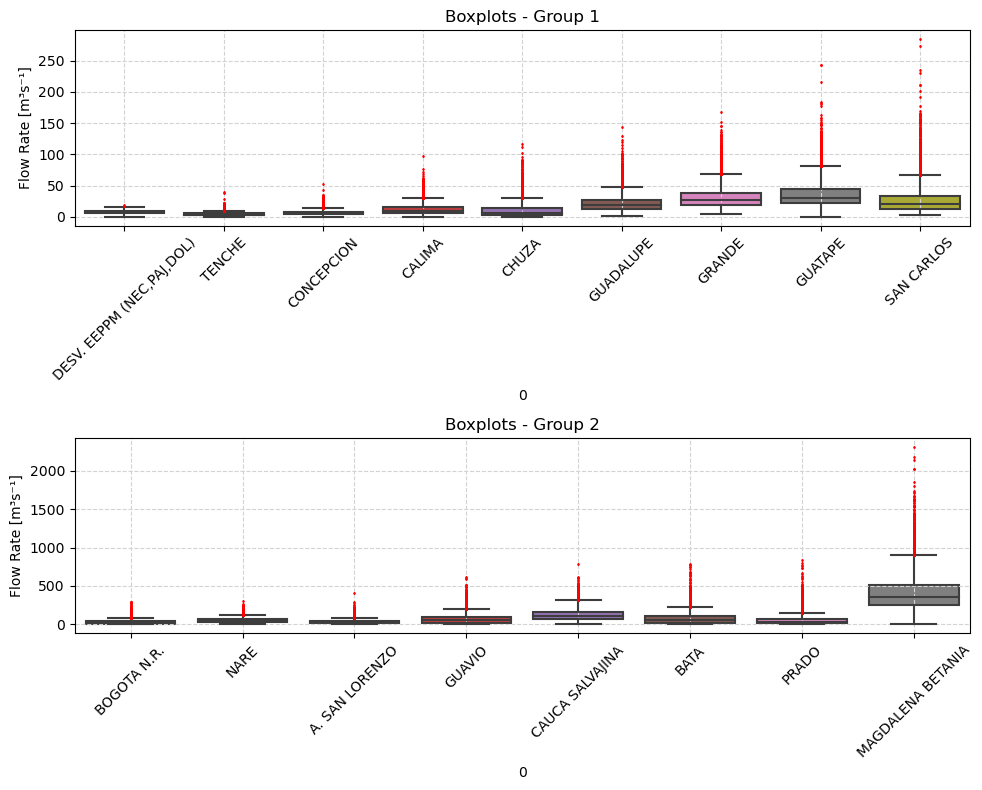

In [31]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Calculate the maximum value for each river
max_values = df.max()

# Sort the rivers based on their maximum values in ascending order
sorted_rivers = max_values.sort_values().index

# Divide the rivers into two groups
rivers_group1 = sorted_rivers[:9]
rivers_group2 = sorted_rivers[9:]

# Create subplots with two subfigures
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Define the parameters for boxplot customization
whisker_width = 1.5
fliers_size = 1# outlier size marker
outlier_color = 'red'  # Specify the color for outliers

# Plot boxplots for rivers in group 1
sns.boxplot(data=df[rivers_group1], ax=axes[0], whis=whisker_width, fliersize=fliers_size, 
            flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})
axes[0].set_title('Boxplots - Group 1')
axes[0].set_ylabel('Flow Rate [m³s⁻¹]')

# Plot boxplots for rivers in group 2
sns.boxplot(data=df[rivers_group2], ax=axes[1], whis=whisker_width, fliersize=fliers_size,
            flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})
axes[1].set_title('Boxplots - Group 2')
axes[1].set_ylabel('Flow Rate [m³s⁻¹]')

# Rotate x-axis labels
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Add a grid to the subfigures
axes[0].grid(color='lightgray', linestyle='--')
axes[1].grid(color='lightgray', linestyle='--')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Filtering outliers using pandas

In [32]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Calculate the IQR for each river
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers
df_filtered = df[(df >= lower_bound) & (df <= upper_bound)]

In [40]:
#max values before filtering outliers
df.max()

0
A. SAN LORENZO               412.7700
CONCEPCION                    53.3680
DESV. EEPPM (NEC,PAJ,DOL)     18.8100
GRANDE                       167.4290
GUADALUPE                    144.5360
GUATAPE                      243.7940
NARE                         309.6700
SAN CARLOS                   284.4400
TENCHE                        39.9300
BOGOTA N.R.                  298.3500
MAGDALENA BETANIA           2309.4400
PRADO                        833.7800
BATA                         791.8000
CHUZA                        116.9400
GUAVIO                       621.1300
CALIMA                        97.3700
CAUCA SALVAJINA              785.1600
dtype: float64

In [39]:
#max values after filtering outliers
df_filtered.max()

0
A. SAN LORENZO               83.6740
CONCEPCION                   12.9320
DESV. EEPPM (NEC,PAJ,DOL)    16.5200
GRANDE                       65.3350
GUADALUPE                    45.9210
GUATAPE                      77.7300
NARE                        117.8330
SAN CARLOS                   62.6700
TENCHE                        9.4500
BOGOTA N.R.                  84.4600
MAGDALENA BETANIA           872.1000
PRADO                       140.5200
BATA                        217.5200
CHUZA                        28.8500
GUAVIO                      192.5300
CALIMA                       29.7800
CAUCA SALVAJINA             306.2600
dtype: float64

### Create box and whisker plots filtering outliers

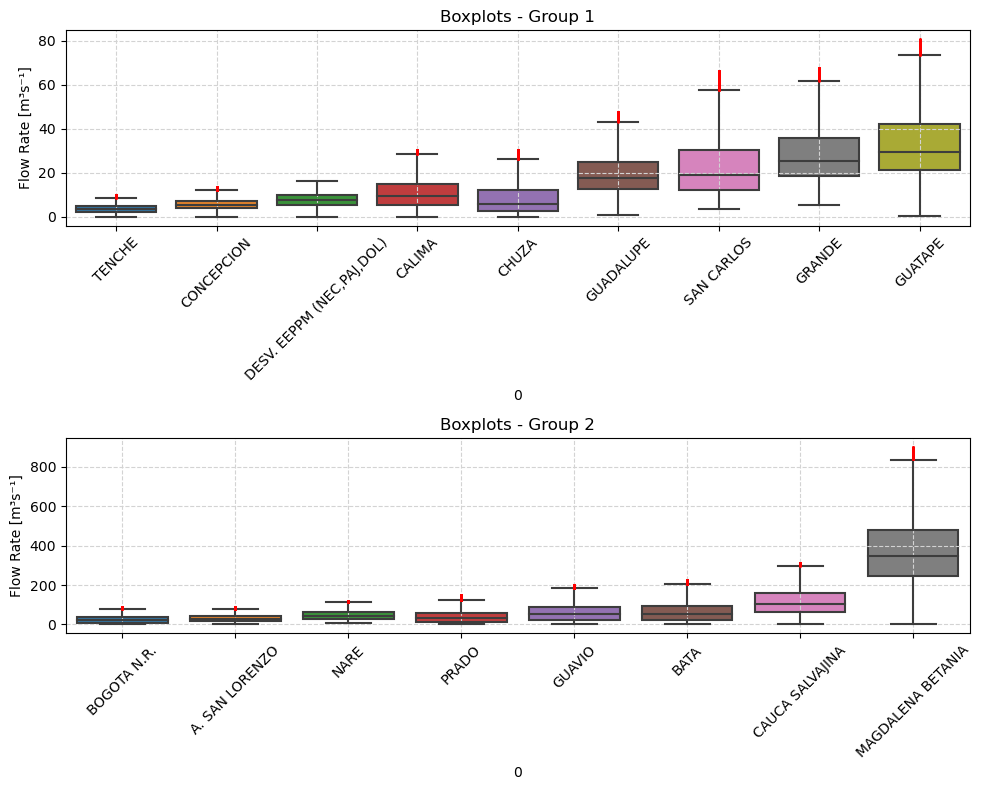

In [37]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Calculate the IQR for each river
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers
df_filtered = df[(df >= lower_bound) & (df <= upper_bound)]

# Calculate the maximum value for each river in the filtered data
max_values = df_filtered.max()

# Sort the rivers based on their maximum values in ascending order
sorted_rivers = max_values.sort_values().index

# Divide the rivers into two groups
rivers_group1 = sorted_rivers[:9]
rivers_group2 = sorted_rivers[9:]

# Create subplots with two subfigures
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Define the parameters for boxplot customization
whisker_width = 1.5
fliers_size = 1
outlier_color = 'red'  # Specify the color for outliers

# Plot boxplots for rivers in group 1
sns.boxplot(data=df_filtered[rivers_group1], ax=axes[0],whis=whisker_width, fliersize=fliers_size,
           flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})

axes[0].set_title('Boxplots - Group 1')
axes[0].set_ylabel('Flow Rate [m³s⁻¹]')

# Plot boxplots for rivers in group 2
sns.boxplot(data=df_filtered[rivers_group2], ax=axes[1],whis=whisker_width, fliersize=fliers_size,
           flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})

axes[1].set_title('Boxplots - Group 2')
axes[1].set_ylabel('Flow Rate [m³s⁻¹]')

# Rotate x-axis labels
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Add a grid to the subfigures
axes[0].grid(color='lightgray', linestyle='--')
axes[1].grid(color='lightgray', linestyle='--')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


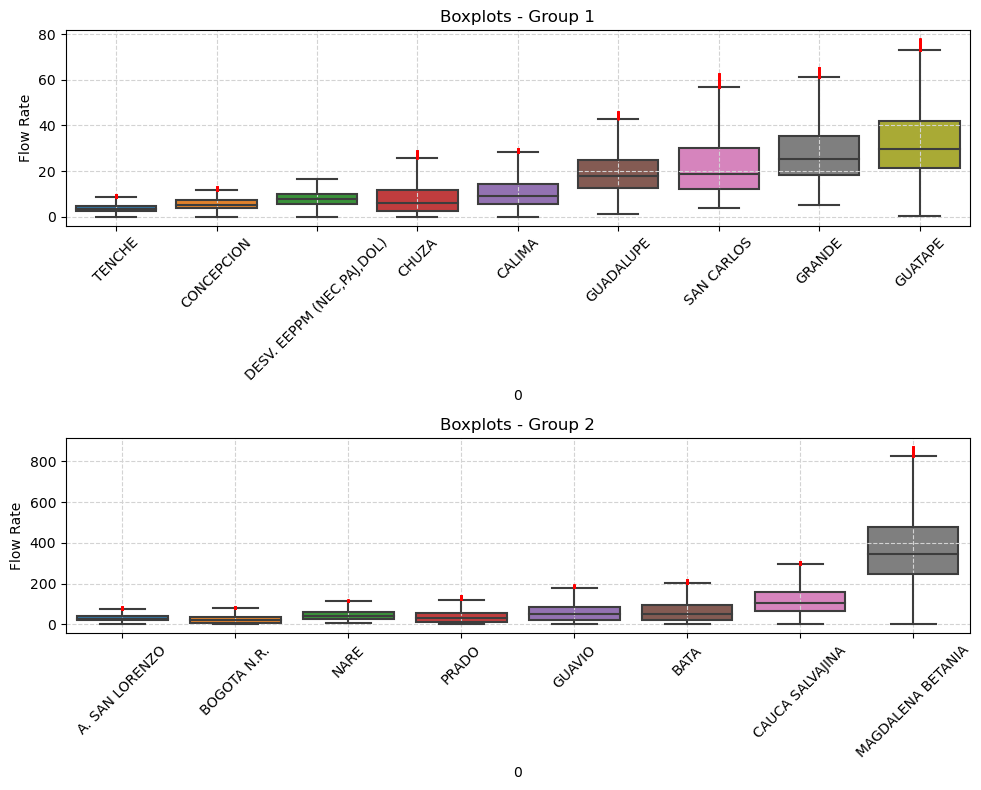

In [38]:
# Assuming your DataFrame is named 'df' with each column representing a river's daily flow rate
df = df_caudal.copy()

# Calculate the IQR for each river
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers
df_filtered = df[(df >= lower_bound) & (df <= upper_bound)]

# Define the custom whisker limits
whisker_lower = df_filtered.quantile(0.25) - 1.5 * iqr
whisker_upper = df_filtered.quantile(0.75) + 1.5 * iqr

# Filter out the points beyond the custom whiskers
df_filtered = df_filtered[(df_filtered >= whisker_lower) & (df_filtered <= whisker_upper)]

# Calculate the maximum value for each river in the filtered data
max_values = df_filtered.max()

# Sort the rivers based on their maximum values in ascending order
sorted_rivers = max_values.sort_values().index

# Divide the rivers into two groups
rivers_group1 = sorted_rivers[:9]
rivers_group2 = sorted_rivers[9:]

# Create subplots with two subfigures
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Define the parameters for boxplot customization
whisker_width = 1.5
fliers_size = 1
outlier_color = 'red'  # Specify the color for outliers

# Plot boxplots for rivers in group 1
sns.boxplot(data=df_filtered[rivers_group1], ax=axes[0], whis=whisker_width, fliersize=fliers_size,
            flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})

axes[0].set_title('Boxplots - Group 1')
axes[0].set_ylabel('Flow Rate')

# Plot boxplots for rivers in group 2
sns.boxplot(data=df_filtered[rivers_group2], ax=axes[1], whis=whisker_width, fliersize=fliers_size,
            flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color})

axes[1].set_title('Boxplots - Group 2')
axes[1].set_ylabel('Flow Rate')

# Rotate x-axis labels
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Add a grid to the subfigures
axes[0].grid(color='lightgray', linestyle='--')
axes[1].grid(color='lightgray', linestyle='--')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
